In [11]:
from pipeline.qiskit_circuit_constructor import qiskit_clone 
from pipeline.run_experiments import get_sim_fidelities

from qiskit import QuantumCircuit
from qiskit import Aer, execute, transpile

# numpy for linear algebra stuff
from numpy.random import randint, shuffle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [12]:
def equatorial_prep(qc, phi):
    qc.h(0)
    ''' 
    qc.x(0)
    qc.sx(0)
    qc.rz(-np.pi/2,0)
    qc.sx(0)
    qc.x(0)
    '''
    qc.rz(phi, 0)
    return qc

In [13]:
def equatorial_measurement_prep(qc, phi):
    qc.rz(-phi,0)
    qc.h(0)
    
    qc.rz(-phi,1)
    qc.h(1)
    
    qc.rz(-phi,2)
    qc.h(2)
    
    '''
    #qc.h(0)
    qc.x(0)
    qc.sx(0)
    qc.rz(-np.pi/2,0)
    qc.sx(0)
    qc.x(0)
    
    qc.rz(-phi,1)
    
    #qc.h(1)
    qc.x(1)
    qc.sx(1)
    qc.rz(-np.pi/2,1)
    qc.sx(1)
    qc.x(1)
    
    qc.rz(-phi,2)
    
    #qc.h(2)
    qc.x(2)
    qc.sx(2)
    qc.rz(-np.pi/2,2)
    qc.sx(2)
    qc.x(2)
    '''
    
    return qc

In [14]:
def equatorial_cloner(theta2, phi):
    qc = QuantumCircuit(3,3)
    
    equatorial_prep(qc, phi)
    qc.barrier()
    
    qiskit_clone(qc, theta2)
    qc.barrier()
    
    equatorial_measurement_prep(qc, phi)
    qc.barrier
    
    qc.measure(0,0)
    qc.measure(1,1)
    qc.measure(2,2)
    
    #return the transpiled circuit
    return transpile(qc, basis_gates=['cx', 'rz', 'id', 'sx', 'x'])

In [15]:
def phase_covariance_ibm(theta2, phi, shots):
        
    qc = equatorial_cloner(theta2, phi)
    
    sim = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend = sim, shots = shots)
    
    bob_fidelity, eve_fidelity, ancilla_fidelity = get_sim_fidelities(job, 0, shots)
    
    return bob_fidelity, eve_fidelity, ancilla_fidelity

In [21]:
equatorial_cloner(np.pi/8, np.pi).draw()

global phase: 3π/4
     ┌─────────┐┌────┐┌──────────┐ ░                                   »
q_0: ┤ Rz(π/2) ├┤ √X ├┤ Rz(-π/2) ├─░───────────────────────────────────»
     └─────────┘└────┘└──────────┘ ░ ┌──────────┐┌────┐┌─────────┐     »
q_1: ──────────────────────────────░─┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├──■──»
                                   ░ └──────────┘└────┘└─────────┘┌─┴─┐»
q_2: ──────────────────────────────░──────────────────────────────┤ X ├»
                                   ░                              └───┘»
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                              »
«q_0: ─────────────────────────────────────────────────────────────────────────»
«                                       ┌───┐┌────────┐┌────┐┌──────────┐┌────┐»
«q_1: ──────────────────────────────────┤ X ├┤ Rz(-π) ├┤ √X ├┤ Rz(3π/4) ├┤ √X ├»
«     ┌────────┐┌────┐┌──────────┐┌────┐└─┬─┘└────────┘└────┘└──────────┘└────┘»
«q_2: ┤ Rz(-π) ├┤ √X ├┤ Rz(3π/4) ├┤ √X ├──■────────────────────────────────────»
«     └────────┘└────┘└──────────┘└────┘                                       »
«c: 3/═════════════════════════════════════════════════════════════════════════»
«                                                                              »
«               ┌───┐┌───┐ ░ ┌──────────┐┌────┐┌─────────┐┌─┐      
«q_0: ──■────■──┤ X ├┤ X ├─░─┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├┤M├──────
«     ┌─┴─┐  │  └─┬─┘└─┬─┘ ░ ├──────────┤├────┤├─────────┤└╥┘┌─┐   
«q_1: ┤ X ├──┼────■────┼───░─┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├─╫─┤M├───
«     └───┘┌─┴─┐       │   ░ ├──────────┤├────┤├─────────┤ ║ └╥┘┌─┐
«q_2: ─────┤ X ├───────■───░─┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├─╫──╫─┤M├
«          └───┘           ░ └──────────┘└────┘└─────────┘ ║  ║ └╥┘
«c: 3/═════════════════════════════════════════════════════╩══╩══╩═
«                                                          0  1  2

/Users/elizabethgrace/miniforge3/envs/quantum/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/elizabethgrace/miniforge3/envs/quantum/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


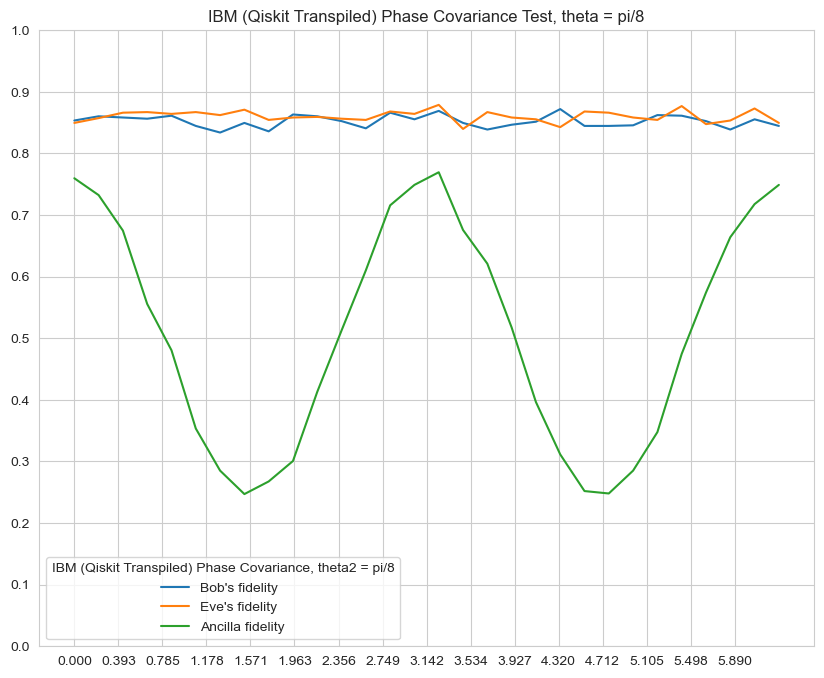

In [17]:
Phi = np.linspace(0, 2*np.pi, 30)

B = []
E = []
A = []

for k in range(len(Phi)):
    b, e, a = phase_covariance_ibm(np.pi/8, Phi[k], 1024)
    B.append(b)
    E.append(e)
    A.append(a)
    
B = np.array(B)
E = np.array(E)
A = np.array(A)

plt.figure(figsize=(10,8))
plt.plot(Phi, B, label = "Bob's fidelity")
plt.plot(Phi, E, label = "Eve's fidelity")
plt.plot(Phi, A, label = "Ancilla fidelity")
plt.yticks(np.arange(0,1.1, step = .1))
plt.xticks(np.arange(0, 2*np.pi, step = np.pi/8))
plt.title("IBM (Qiskit Transpiled) Phase Covariance Test, theta = pi/8")
plt.legend(title="IBM (Qiskit Transpiled) Phase Covariance, theta2 = pi/8")
plt.show()

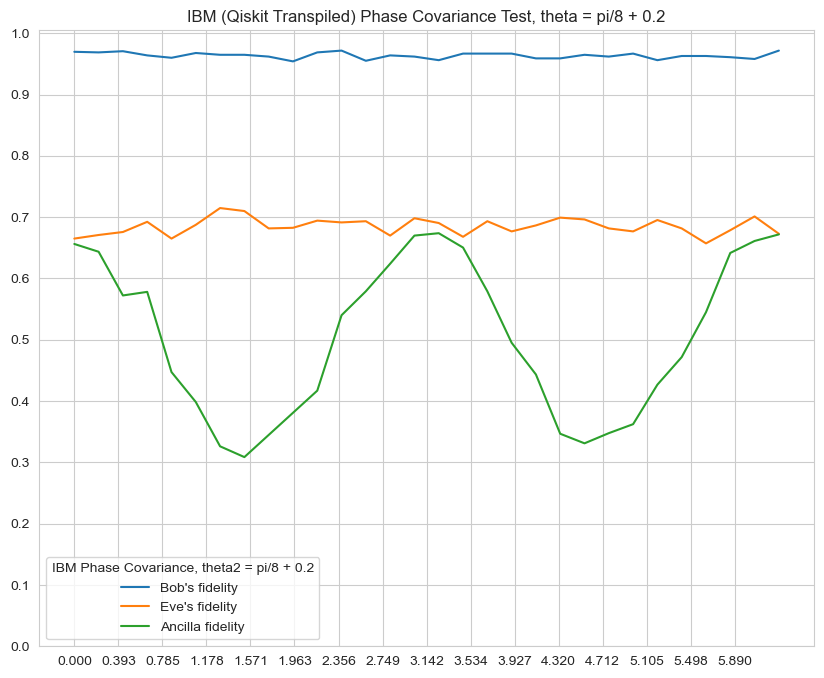

In [18]:
Phi = np.linspace(0, 2*np.pi, 30)

B = []
E = []
A = []

for k in range(len(Phi)):
    b, e, a = phase_covariance_ibm(np.pi/8 + 0.2, Phi[k], 1024)
    B.append(b)
    E.append(e)
    A.append(a)
    
B = np.array(B)
E = np.array(E)
A = np.array(A)

plt.figure(figsize=(10,8))
plt.plot(Phi, B, label = "Bob's fidelity")
plt.plot(Phi, E, label = "Eve's fidelity")
plt.plot(Phi, A, label = "Ancilla fidelity")
plt.yticks(np.arange(0,1.1, step = .1))
plt.xticks(np.arange(0, 2*np.pi, step = np.pi/8))
plt.title("IBM (Qiskit Transpiled) Phase Covariance Test, theta = pi/8 + 0.2")
plt.legend(title="IBM Phase Covariance, theta2 = pi/8 + 0.2")
plt.show()

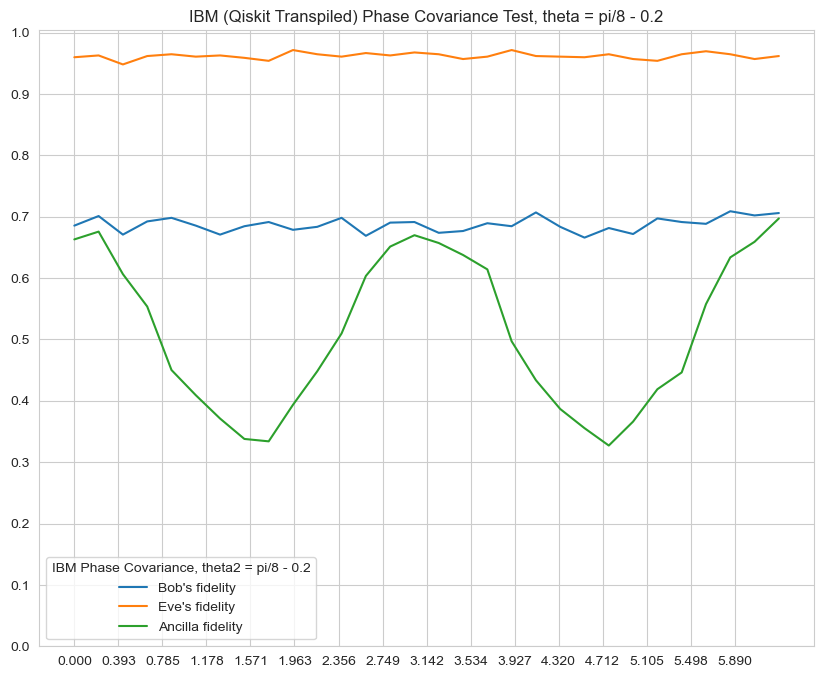

In [19]:
Phi = np.linspace(0, 2*np.pi, 30)

B = []
E = []
A = []

for k in range(len(Phi)):
    b, e, a = phase_covariance_ibm(np.pi/8 - 0.2, Phi[k], 1024)
    B.append(b)
    E.append(e)
    A.append(a)
    
B = np.array(B)
E = np.array(E)
A = np.array(A)

plt.figure(figsize=(10,8))
plt.plot(Phi, B, label = "Bob's fidelity")
plt.plot(Phi, E, label = "Eve's fidelity")
plt.plot(Phi, A, label = "Ancilla fidelity")
plt.yticks(np.arange(0,1.1, step = .1))
plt.xticks(np.arange(0, 2*np.pi, step = np.pi/8))
plt.title("IBM (Qiskit Transpiled) Phase Covariance Test, theta = pi/8 - 0.2")
plt.legend(title="IBM Phase Covariance, theta2 = pi/8 - 0.2")
plt.show()